# Projectile Motion With Drag
## APL703
### Soban Nasir Lone
### 2022AMY7554


The governing equations of motion are given as:

$ x'' = -(1/2m) \rho C_D AV^2 cos(a) $ \
$ y'' = -g - (1/2m) \rho C_D AV^2 sin(a) $ \
where, $V = \sqrt(u^2 + v^2) $\
$u = dx/dt $\
$v = dy/dt $\
and, $cos(a) = u/V$\
$sin(a) = v/V$

The equations simplify to:

$ x'' = -(1/2m) \rho C_D AV *u $ \
$ y'' = -g - (1/2m) \rho C_D AV *v $

And, using $ x'' = u' $ \
and, $ y'' = v'$, we get the equation in the form that can be solved by Odeint

### Problem Chosen

#### Kicking of football and it's trajectory plotted

The values of different parameters: \
Mass of Football, $m = 0.45 Kg$ \
Coefficient of Drag, $C_D= 0.25$ \
Initial Velocity, $V = 20 m/s$ \
Density of air, $\rho = 1.22 kg/m^3 $ \
Radius of ball, $ r = 0.11m $ \
Initail Angle of Projectile, $ \theta = 60{\circ}$

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [7]:
m = 0.45 
C_d = 0.25
V = 20
ρ = 1.22                            
r = 0.11                           
A = np.pi*(r**2)                      
θ = np.pi/3             
g = 9.81
K = (-1/(2*m))*ρ*C_d*A*V            
K

-0.25764550417940296

In [8]:
state = [0,V*np.cos(θ),0,V*np.sin(θ)]
t = np.linspace(0,5,10000)

In [15]:
def projectile(state,t,K):
    x, u, y, v = state
    V = np.sqrt(u**2 + v**2)
    dx1 = K*u
    dy1 = -g + K*v
    return[u,dx1, v, dy1]

In [28]:
p = (K,)

Text(0.5, 1.0, 'Path of a football kicked at an angle 60 with drag force acting on it')

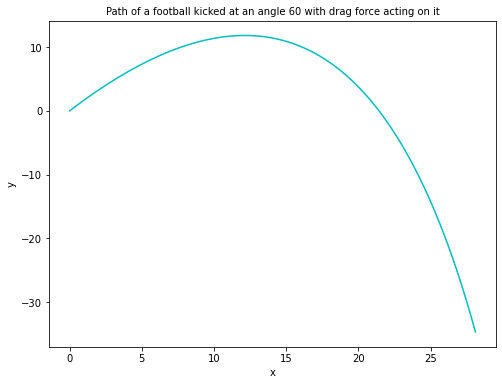

In [29]:
result = odeint(projectile, state,t,p)

plt.figure(figsize=(8,6))
plt.plot(result[:,0], result[:,2],'c')
plt.xlabel('x', fontsize = 10)
plt.ylabel('y',fontsize = 10)
plt.title('Path of a football kicked at an angle 60 with drag force acting on it', fontsize = 10)


Since the negative values of y don't make any sense, we will get rid of them


Text(0.5, 1.0, 'Football projectile, V=20m/s, θ = 60')

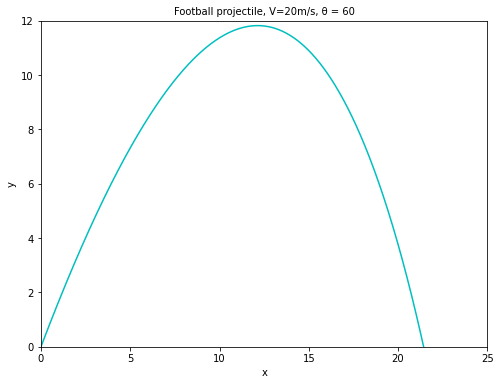

In [170]:
result1 = result[result[:,2]>=0]

plt.figure(figsize=(8,6))
plt.plot(result1[:,0], result1[:,2],'c')
plt.xlabel('x', fontsize = 10)
plt.ylabel('y', fontsize = 10)
plt.xlim(0,25)
plt.ylim(0,12)

plt.title('Football projectile, V=20m/s, θ = 60', fontsize = 10)

In [171]:
result1

array([[ 0.00000000e+00,  1.00000000e+01,  0.00000000e+00,
         1.73205081e+01],
       [ 5.00017795e-03,  9.99871173e+00,  8.65933586e-03,
         1.73133715e+01],
       [ 9.99971175e-03,  9.99742362e+00,  1.73151033e-02,
         1.73062359e+01],
       ...,
       [ 2.14260121e+01,  4.47968431e+00,  1.73205039e-02,
        -1.32598771e+01],
       [ 2.14282520e+01,  4.47910720e+00,  1.06891030e-02,
        -1.32630740e+01],
       [ 2.14304917e+01,  4.47853017e+00,  4.05610362e-03,
        -1.32662705e+01]])

### Now we need to find the Angle which gives maximum range

In [172]:
V = 20
def Range(ϕ):
    state = [0,V*np.cos(ϕ),0,V*np.sin(ϕ)]
    result = odeint(projectile, state, t, p)
    result1 = result[result[:,2]>=0]
    xmax = np.max(result1[:,0])
    
    return(xmax)

In [173]:
Range(np.pi/3)

21.43049167138347

For our initial conditions, the range is 21.43 m 

### For Different Values of Angles, range is calculated

In [174]:
w = []
k = []
ϕ = np.linspace(0,np.pi/2,num = 1000)
for i in ϕ:
    d = Range(i)
    l = i
    k.append(l)
    w.append(d)


(0.0, 90.0)

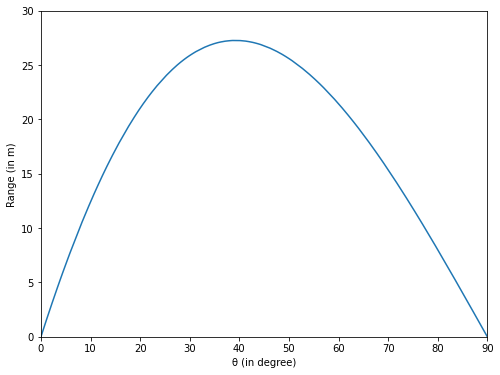

In [185]:
plt.figure(figsize = (8,6))
plt.plot(np.linspace(0,90,1000),w)
plt.xlabel('θ (in degree)', fontsize = 10)
plt.ylabel('Range (in m)', fontsize = 10)
plt.ylim(0,30)

plt.xlim(0,90)


In [176]:
arr = np.vstack((w, k))
max(arr[0])

27.260056121870274

In [177]:
i = 0
while i<1000:
    if max(arr[0]) == arr[0][i]:
        print(arr[1][i]*180/(np.pi))
    i = i + 1

39.189189189189186


Maximum value of range $= 27.26 m$ for an angle of $39.189{\circ}$

   ## Plotting for various values of theta

In [178]:
state = [0,V*np.cos(39.189*np.pi/180),0,V*np.sin(39.189*np.pi/180)]
t = np.linspace(0,5,10000)
result_max = odeint(projectile, state,t,p)

In [179]:
state = [0,V*np.cos(45*np.pi/180),0,V*np.sin(45*np.pi/180)]
result45 = odeint(projectile, state,t,p)

In [180]:
state = [0,V*np.cos(60*np.pi/180),0,V*np.sin(60*np.pi/180)]
result60 = odeint(projectile, state,t,p)

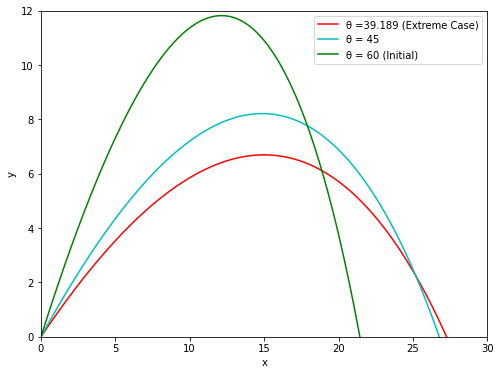

In [186]:
result_39 = result_max[result_max[:,2]>=0]
result_45 = result45[result45[:,2]>=0]
result_60 = result60[result60[:,2]>=0]


plt.figure(figsize=(8,6))
plt.plot(result_39[:,0], result_39[:,2],'r', label='θ =39.189 (Extreme Case)')
plt.plot(result_45[:,0], result_45[:,2],'c', label='θ = 45')

plt.plot(result_60[:,0], result_60[:,2],'g', label = 'θ = 60 (Initial)')

plt.xlabel('x', fontsize = 10)
plt.ylabel('y', fontsize = 10)

plt.xlim(0,30)

plt.ylim(0,12)
plt.legend()